# Import libraries & data

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle
import joblib
import warnings
warnings.filterwarnings('ignore')

In [113]:
data = pd.read_csv('/content/calories_burn.csv')
data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193,86,11,92,40.4,45
14996,17212577,female,27,165,65,6,85,39.2,23
14997,17271188,female,43,159,58,16,90,40.1,75
14998,18643037,male,78,193,97,2,84,38.3,11


# EDA

In [114]:
data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


In [116]:
#show if there any missing values in data
data.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


In [117]:
# Show duplicated rows
data.duplicated().sum()

0

In [118]:
# Convert 'Gender' to numeric values and remove original
#from sklearn.preprocessing import LabelEncoder
#leabel_encoder = LabelEncoder()
#data['Gender_numeric'] =leabel_encoder.fit_transform(data['Gender'])
#data.drop('Gender', axis=1, inplace=True)
#print(data['Gender_numeric'].unique())


data.replace({'Gender':{'male':0,'female':1}},inplace=True)
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190,94,29,105,40.8,231
1,14861698,1,20,166,60,14,94,40.3,66
2,11179863,0,69,179,79,5,88,38.7,26
3,16180408,1,34,179,71,13,100,40.5,71
4,17771927,1,27,154,58,10,81,39.8,35


In [119]:
# Display unique values for each column
for col in data.columns:
  print(f"column: {col}")
  print(f"unique values: " ,data[col].unique())
  print("________________________")

column: User_ID
unique values:  [14733363 14861698 11179863 ... 17271188 18643037 11751526]
________________________
column: Gender
unique values:  [0 1]
________________________
column: Age
unique values:  [68 20 69 34 27 36 33 41 60 26 21 66 32 53 39 46 50 67 31 48 29 42 62 38
 25 24 22 74 70 44 61 63 54 47 35 28 77 64 45 57 49 40 55 23 43 52 79 51
 59 30 37 56 58 78 73 76 72 65 71 75]
________________________
column: Height
unique values:  [190 166 179 154 151 158 175 186 146 177 157 171 182 156 169 188 189 148
 165 176 173 159 183 160 184 155 195 152 193 168 174 191 164 198 170 167
 185 163 192 178 197 187 144 202 201 181 136 180 194 143 149 172 153 147
 199 161 204 203 145 200 150 162 205 208 209 206 140 132 196 207 212 135
 133 139 138 217 211 142 137 213 210 141 123 214 127 218 126 134 222 219]
________________________
column: Weight
unique values:  [ 94  60  79  71  58  50  56  85  51  76  54  62  82  67  65  86  93  59
  75  73  88  68  84  80  57  70  66  55  98  69 101  89  

In [120]:
# Display unique values for each column
print(data["Height"].value_counts())
print(data["Weight"].value_counts())
print(data["Heart_Rate"].value_counts())
print(data["Body_Temp"].value_counts())
print(data["Calories"].value_counts())

Height
179    394
169    388
176    383
171    374
177    371
      ... 
123      1
127      1
126      1
222      1
219      1
Name: count, Length: 90, dtype: int64
Weight
66     374
67     370
63     361
61     360
68     359
      ... 
120      1
122      1
36       1
128      1
123      1
Name: count, Length: 91, dtype: int64
Heart_Rate
91     564
94     560
101    550
97     531
90     526
99     524
98     523
96     515
95     511
93     509
89     492
100    492
92     485
102    481
105    475
103    462
87     459
88     444
104    440
86     421
85     420
107    407
106    391
84     366
108    352
83     339
82     299
109    276
110    249
81     238
111    207
80     207
79     191
112    169
113    143
78     112
114    107
77     103
76      82
115     71
75      54
116     49
117     44
74      40
73      28
118     21
72      15
119     12
71       8
120      7
121      7
70       5
69       5
67       3
122      3
125      2
68       2
123      1
128      1
Name: co

In [121]:
corr = data.corr(numeric_only=True)
corr.style.background_gradient(cmap="copper_r")

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,1.000000,0.000687,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923,-0.001661
Gender,0.000687,1.000000,-0.003222,-0.710534,-0.783186,-0.003440,-0.011555,-0.007264,-0.022357
Age,-0.001827,-0.003222,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,-0.013520,-0.710534,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,-0.011603,-0.783186,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,-0.002751,-0.003440,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,-0.000457,-0.011555,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.000923,-0.007264,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,-0.001661,-0.022357,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


In [122]:
data.drop('User_ID', axis=1, inplace=True)

# Data Cleaning & Preprocessing

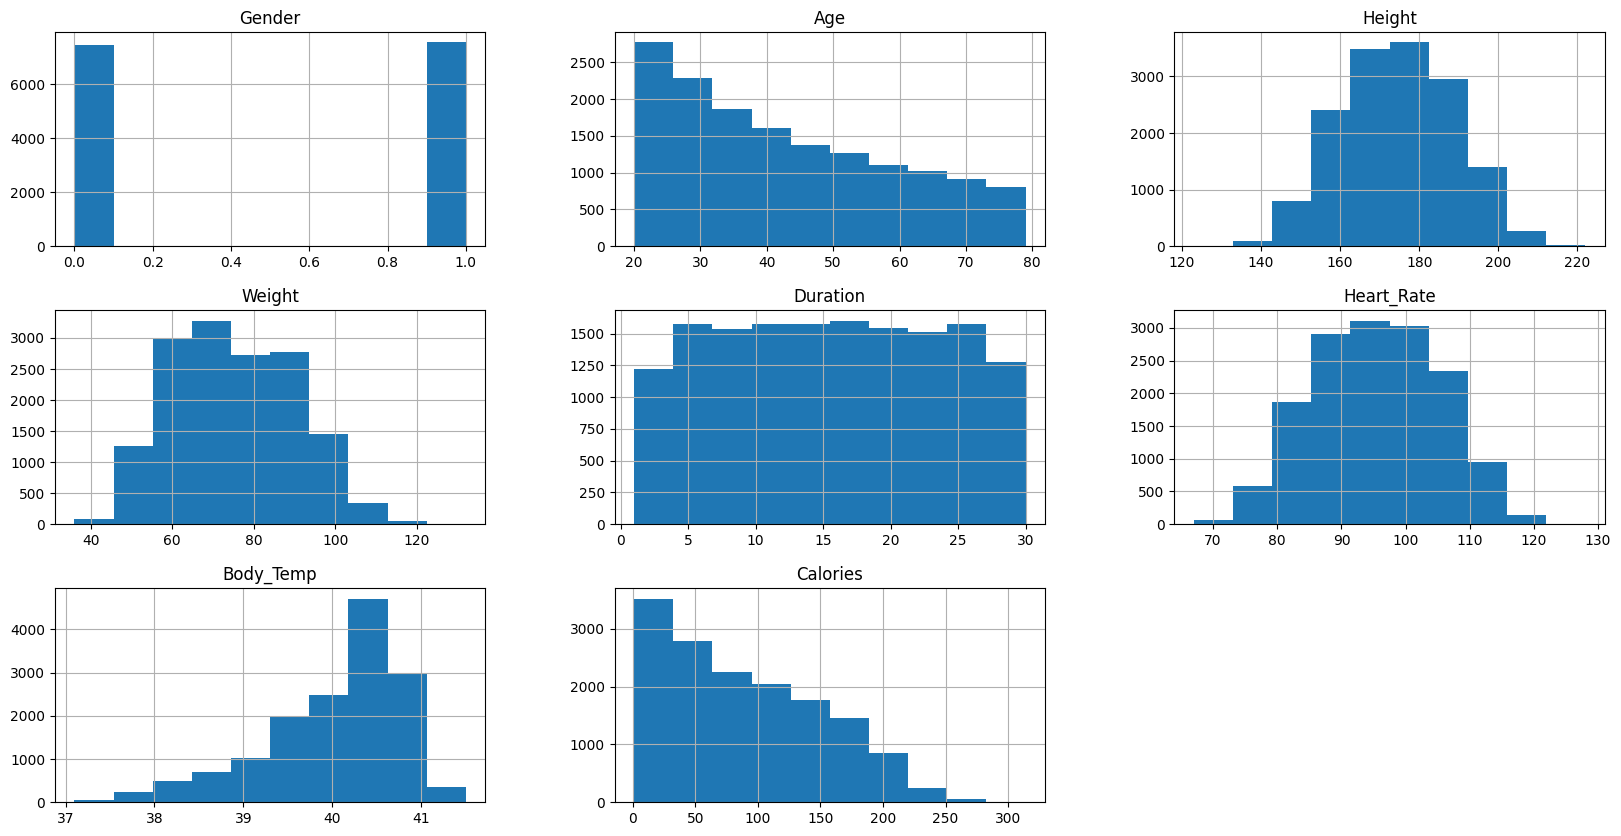

In [123]:
# see the distribution of the data
data.hist(figsize=(20, 10))
plt.show()

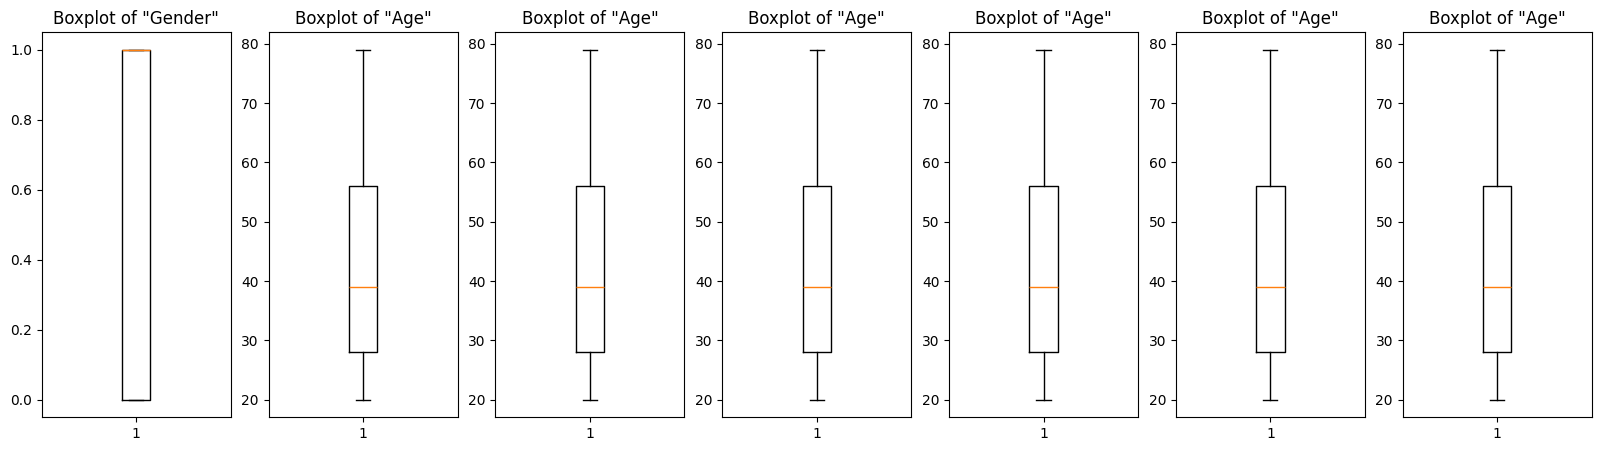

In [124]:
fig, axes = plt.subplots(1,7,figsize=(20,5))
n = 0
for i,ax in enumerate(axes):
    ax.boxplot(data[data.columns[n]])
    ax.set_title(f'Boxplot of "{data.columns[n]}"')
    n=1

In [125]:
# Using 0.5 * IQR for a less strict outlier detection, capturing fewer extreme values
Q1 = data['Height'].quantile(0.25)
Q3 = data['Height'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + .5 * IQR
lower_bound = Q1 - .5 * IQR
print(f"upper_bound: {upper_bound}")
print(f"lower_bound: {lower_bound}")
data['Height'] = np.where(data['Height'] > upper_bound, upper_bound, data['Height'])
data['Height'] = np.where(data['Height'] < lower_bound, lower_bound, data['Height'])

upper_bound: 195.5
lower_bound: 153.5


In [126]:
# Using 1.5 * IQR for a less strict outlier detection, capturing fewer extreme values
Q1 = data['Weight'].quantile(0.25)
Q3 = data['Weight'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
print(f"upper_bound: {upper_bound}")
data['Weight'] = np.where(data['Weight'] > upper_bound, upper_bound, data['Weight'])

upper_bound: 123.0


In [127]:
# Using 1.5 * IQR for a less strict outlier detection, capturing fewer extreme values
Q1 = data['Heart_Rate'].quantile(0.25)
Q3 = data['Heart_Rate'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
print(f"upper_bound: {upper_bound}")
data['Heart_Rate'] = np.where(data['Heart_Rate'] > upper_bound, upper_bound, data['Heart_Rate'])

upper_bound: 125.5


In [128]:
# Using 1.5 * IQR for a less strict outlier detection, capturing fewer extreme values
Q1 = data['Body_Temp'].quantile(0.25)
Q3 = data['Body_Temp'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
print(f"lower_bound: {lower_bound}")
data['Body_Temp'] = np.where(data['Body_Temp'] < lower_bound, lower_bound, data['Body_Temp'])

lower_bound: 38.1


In [129]:
# Using 1.5 * IQR for a less strict outlier detection, capturing fewer extreme values
Q1 = data['Calories'].quantile(0.25)
Q3 = data['Calories'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
print(f"upper_bound: {upper_bound}")
data['Calories'] = np.where(data['Calories'] > upper_bound, upper_bound, data['Calories'])

upper_bound: 292.5


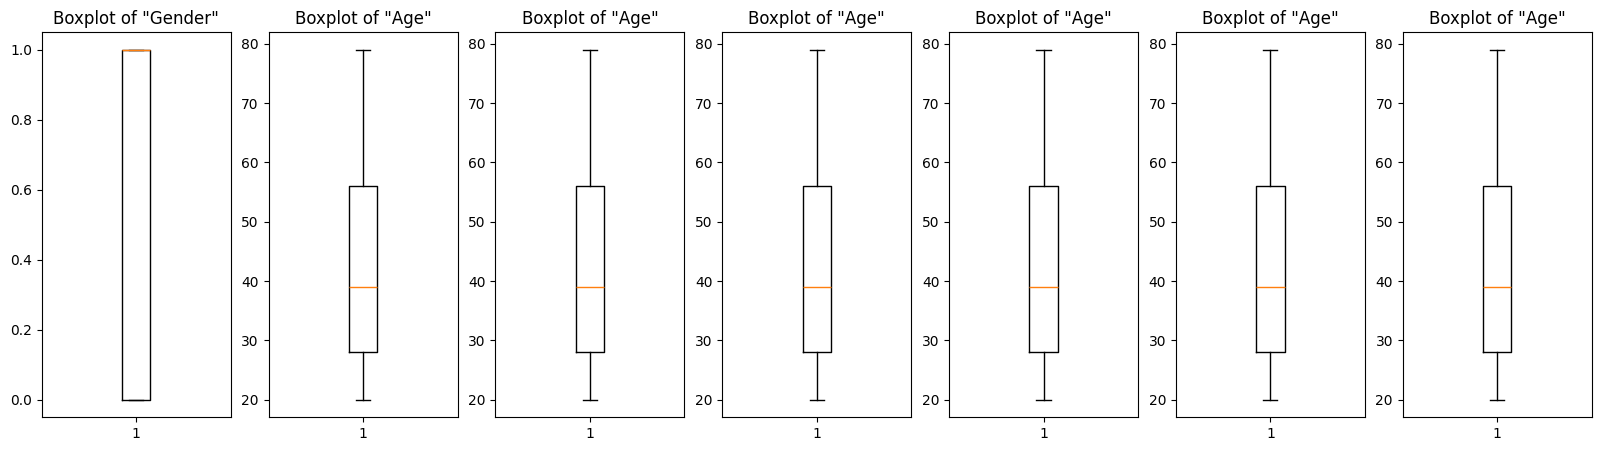

In [130]:
fig, axes = plt.subplots(1,7,figsize=(20,5))
n = 0
for i,ax in enumerate(axes):
    ax.boxplot(data[data.columns[n]])
    ax.set_title(f'Boxplot of "{data.columns[n]}"')
    n=1

In [131]:
data.describe()


,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.503533,42.789800,174.475567,74.965400,15.530600,95.518367,40.033207,89.537267
std,0.500004,16.980264,12.935537,15.030691,8.319203,9.582785,0.757570,62.449328
min,0.000000,20.000000,153.500000,36.000000,1.000000,67.000000,38.100000,1.000000
25%,0.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.000000,79.000000,195.500000,123.000000,30.000000,125.500000,41.500000,292.500000


# Build Model

In [134]:
X = data.drop('Calories', axis=1)
y = data['Calories']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models and hyperparameter grids
models = {
    "linear_regression": (LinearRegression(), {}),
    "lasso_regression": (Lasso(), {"model__alpha": [0.1, 1.0, 10.0]}),
    "decision_tree": (DecisionTreeRegressor(random_state=42), {"model__max_depth": [5, 10, 20]}),
    "random_forest": (RandomForestRegressor(random_state=42), {"model__n_estimators": [50, 100], "model__max_depth": [10, 20]}),
    "xgboost": (XGBRegressor(random_state=42), {"model__n_estimators": [50, 100], "model__learning_rate": [0.1, 0.2]})
}

# Dictionary to store the results of each model after training and evaluation
results = {}

for model_name, (model, param_grid) in models.items():
    print(f"Training {model_name}...")

    # pipeline used to create a sequence of steps to process data and train the model easily.
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("model", model)
    ])
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="r2", n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Make predictions on train and test sets
    y_train_pred = grid_search.best_estimator_.predict(X_train)
    y_test_pred = grid_search.best_estimator_.predict(X_test)

    # Calculate the evaluation metrics
    mae = mean_absolute_error(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    rmse_train = mean_squared_error(y_train, y_train_pred) ** 0.5
    rmse_test = mean_squared_error(y_test, y_test_pred) ** 0.5

    results[model_name] = {
        "Best Parameters": grid_search.best_params_,
        "MAE": mae,
        "MSE": mse,
        "R² Train": r2_train,
        "R² Test": r2_test,
        "RMSE Train": rmse_train,
        "RMSE Test": rmse_test
    }

# Sort results based on R² score (descending order by reverse=True)
sorted_results = sorted(results.items(), key=lambda x: x[1]["R² Test"], reverse=True)

print("\nModel Evaluation Results:")
for model_name, result in sorted_results:
    print(f"{model_name}:")
    print(f"  Best Parameters: {result['Best Parameters']}")
    print(f"  MAE: {result['MAE']}")
    print(f"  MSE: {result['MSE']}")
    print(f"  R² Train: {result['R² Train']}")
    print(f"  R² Test: {result['R² Test']}")
    print(f"  RMSE Train: {result['RMSE Train']}")
    print(f"  RMSE Test: {result['RMSE Test']}")
    print("---------------------------------------" )

best_model_name, best_model_result = sorted_results[0]
print(f"Best Model: {best_model_name}")


Training linear_regression...
Training lasso_regression...
Training decision_tree...
Training random_forest...
Training xgboost...

Model Evaluation Results:
xgboost:
  Best Parameters: {'model__learning_rate': 0.1, 'model__n_estimators': 100}
  MAE: 1.2378031683613857
  MSE: 3.179846945616672
  R² Train: 0.9995479883641382
  R² Test: 0.9992120225190655
  RMSE Train: 1.321703164141004
  RMSE Test: 1.7832125351782024
---------------------------------------
random_forest:
  Best Parameters: {'model__max_depth': 20, 'model__n_estimators': 100}
  MAE: 1.7115653253968255
  MSE: 7.163977732345993
  R² Train: 0.999694469032242
  R² Test: 0.9982247406169071
  RMSE Train: 1.0866426333952652
  RMSE Test: 2.6765608030354913
---------------------------------------
decision_tree:
  Best Parameters: {'model__max_depth': 20}
  MAE: 3.369222222222222
  MSE: 27.097592592592594
  R² Train: 0.9999999748436691
  R² Test: 0.9932851193420065
  RMSE Train: 0.009860132971832693
  RMSE Test: 5.20553480370582
-

In [136]:

# Save the model
joblib.dump(best_model_name, "optimized_best_model.pkl")


['optimized_best_model.pkl']